# Exploratory Data Analysis- Terrorism

## Author: Akhil

## Problem Statement:
1. Perform "Exploratory Data Analysis" on dataset Global Terrorism.
2. As a security/defence analyst, try to find out the hot zone of terrorism.
3. What all the security issue and insight you can derive by EDA.

### Importing Libraries

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
data=pd.read_csv(r'C:\Users\hp\Downloads\globalterrorism.csv',encoding='latin1')

In [28]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [29]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#### Note:
Since it has 135 columns. They have a huge proportion of dataset and learning them doesn't make any sense.So, we will rename the columns for better understanding and take out only neseccery columns. 

In [30]:
#rename the columns
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data['Casualities'] = data.Killed + data.Wounded
# filtering out the important data in whole dataset those I'm using further processing.
data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Casualities']]

In [31]:
data.head() #Extracting new data

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


### Cleaning the data

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
 18  Casualities  164817 non-

In [34]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'Killed'}>],
       [<AxesSubplot:title={'center':'Wounded'}>,
        <AxesSubplot:title={'center':'Casualities'}>, <AxesSubplot:>]],
      dtype=object)

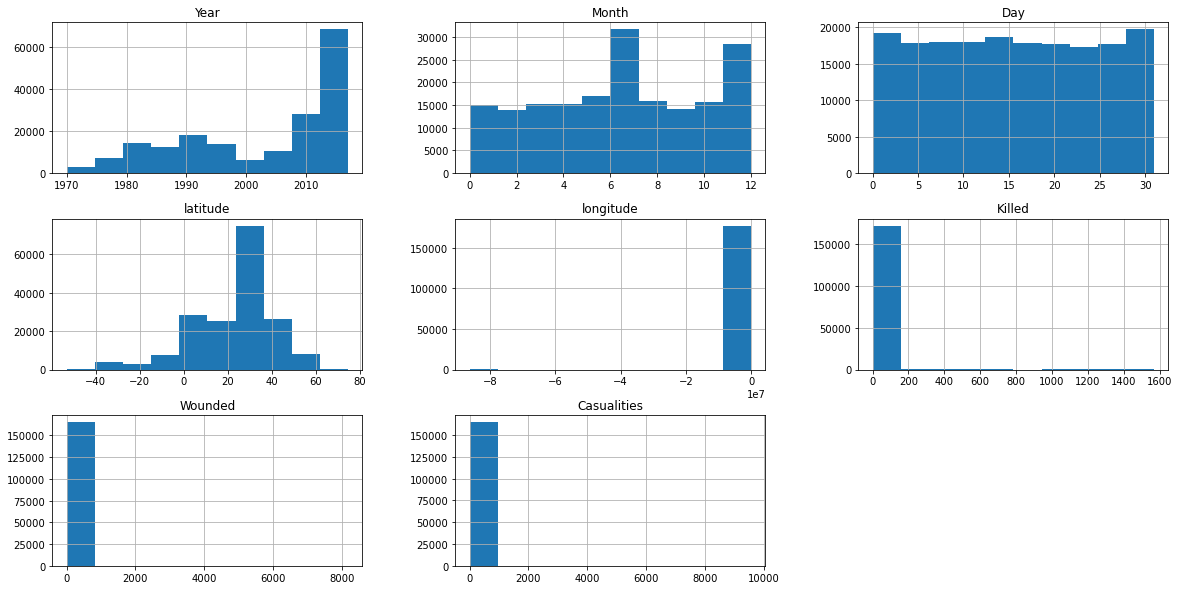

In [35]:
data.hist(figsize=(20,10))


In [13]:
data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


### Observation
1. The data consists of terrorist activities ranging from the year: 1970 to 2017
2. Maximum number of people killed in an event were: 1570
3. Maximum number of people wounded in an event were: 8191
4. Maximum number of total casualties in an event were: 9574

### Correlation Analysis

<AxesSubplot:>

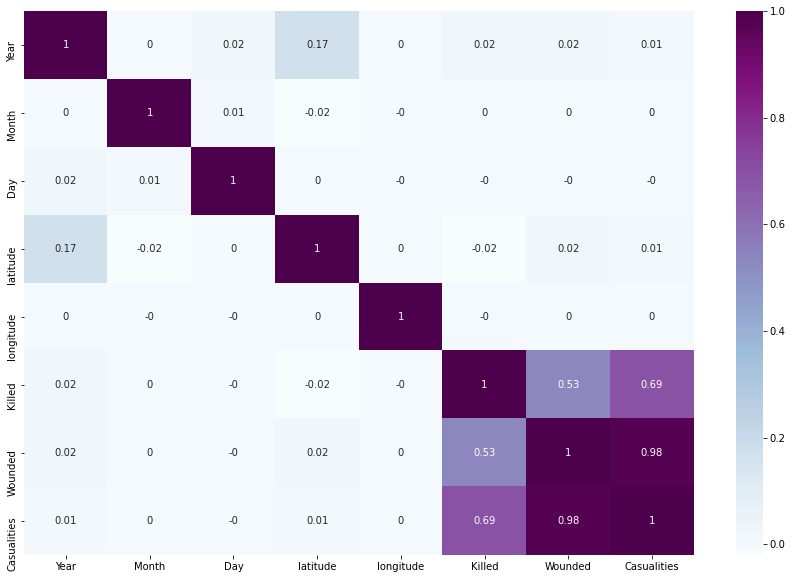

In [36]:
plt.figure(figsize=(15,10))
# we use heat map to find out the correlation with one and other in dataset
sns.heatmap(np.round(data.corr(),2),annot=True, cmap="BuPu")

### Number of terrorist activity each year

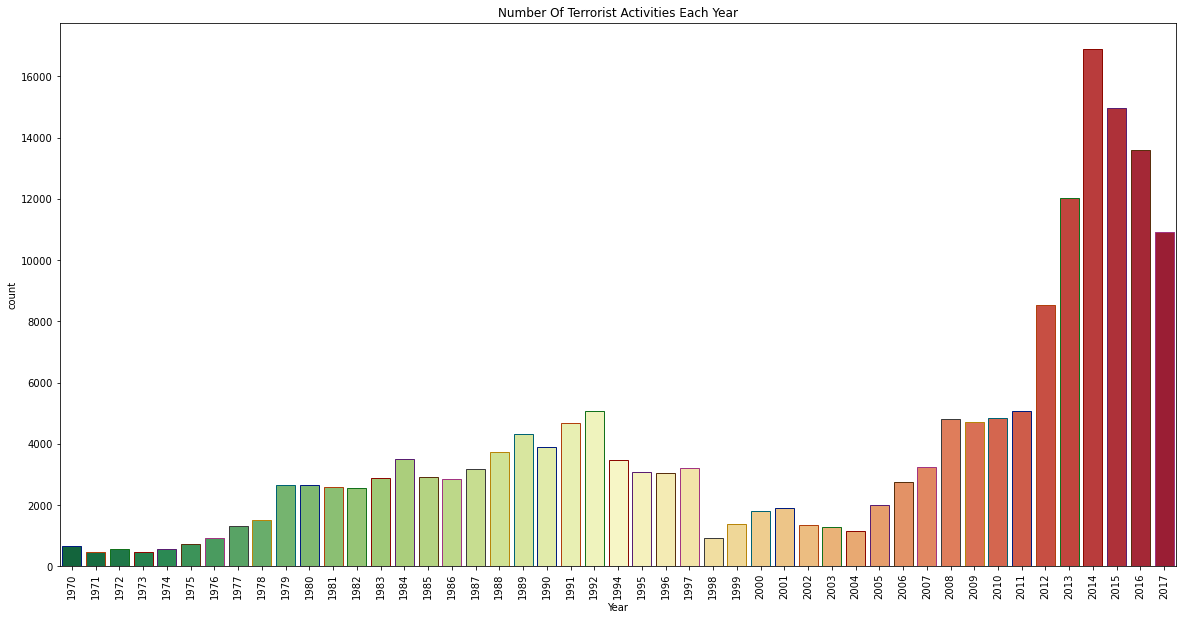

In [39]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

#### Note:
2014 and 2015 have most terrorist activity

### Number of Casualities each year

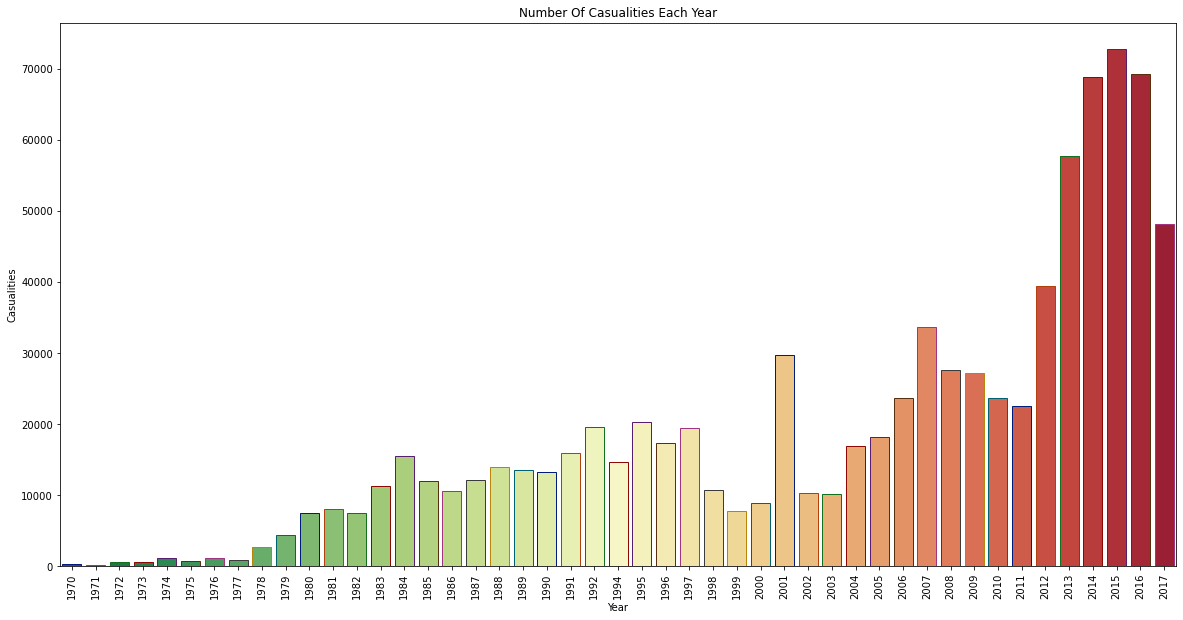

In [48]:
plt.subplots(figsize=(20,10))
year_cas = data.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

### Number of Total attack in each country

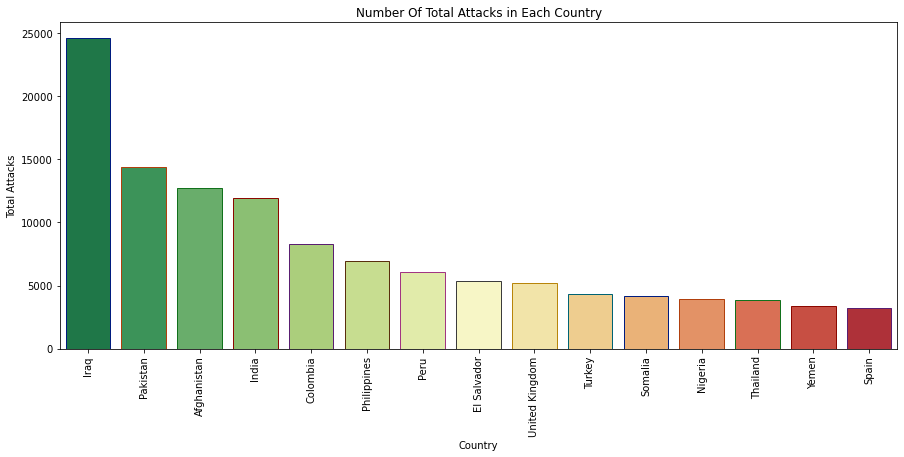

In [51]:
plt.subplots(figsize=(15,6))
country_attacks = data.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'RdYlGn_r',
            edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Country')
plt.show()

### Terrorist activity by region each year

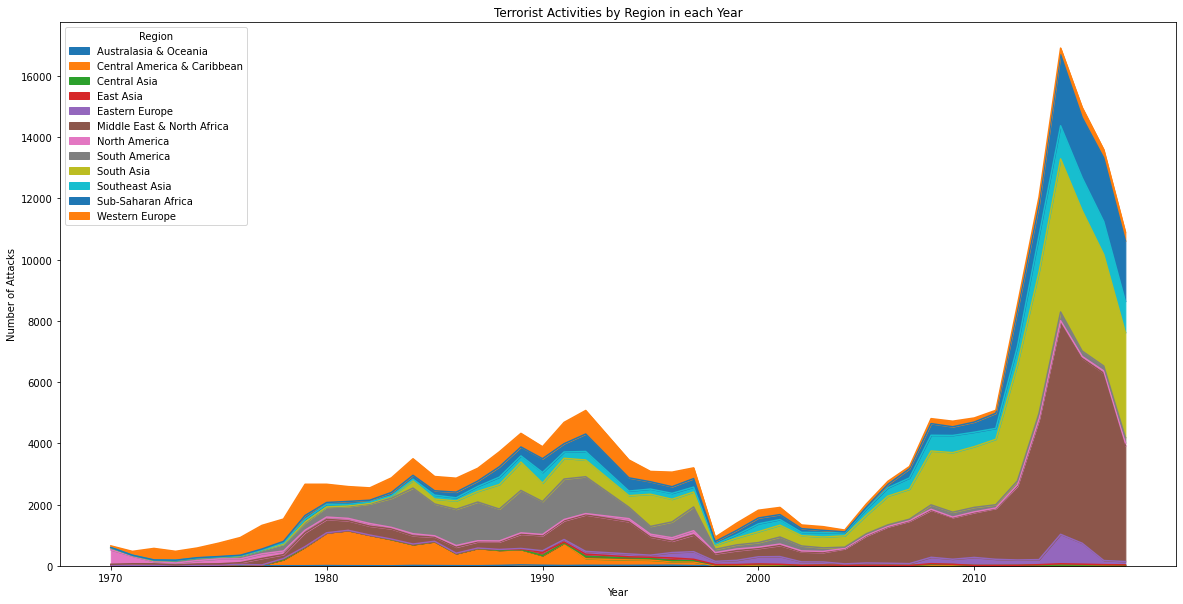

In [53]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Method of attack

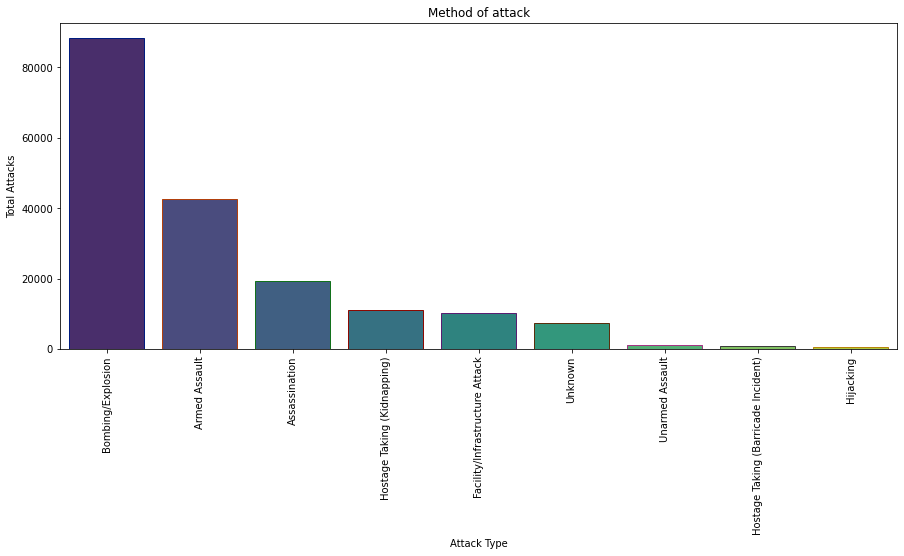

In [56]:
attack_type = data.AttackType.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], palette='viridis',
            edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title('Method of attack')
plt.show()

#### Obervation:
Since from the above chart it is clear that Bombing/Explosion is mostly used attack

### Type of Target

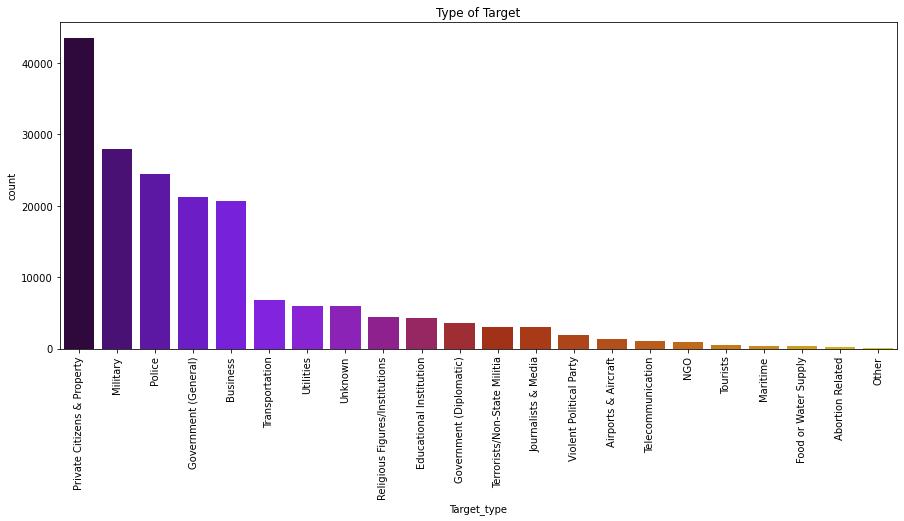

In [62]:
plt.figure(figsize=(15,6))
sns.countplot(data['Target_type'],order=data['Target_type'].value_counts().index,palette='gnuplot')
plt.xticks(rotation=90)
plt.title('Type of Target')
plt.show()

### Total number of terrorist attack in each country and region using barplot

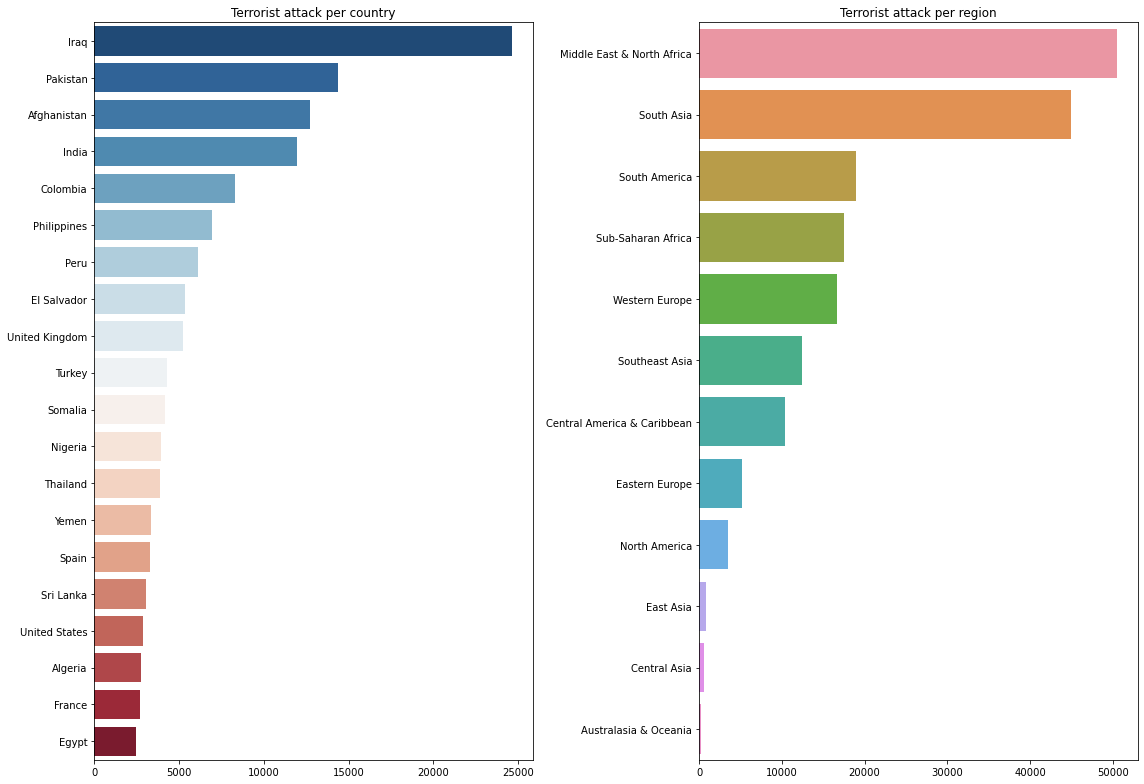

In [74]:
fig,axes=plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x=data['Country'].value_counts()[:20].values, y=data['Country'].value_counts()[:20].index,
            ax=axes[0],palette='RdBu_r')
axes[0].set_title('Terrorist attack per country')
sns.barplot(x=data['Region'].value_counts().values, y=data['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist attack per region')
fig.tight_layout()
plt.show()

### Total number of attack in each country using globe
First we will create a new dataframe which contain the total count of attack for each country to use as it color bar

In [75]:
d=data.groupby(['Country'],as_index=False).count()

In [85]:
fig=px.choropleth(d,locations='Country',color='Year',hover_name='Country', 
                  projection='orthographic',title='Total number of attack (1970-2017)',labels={'Years':'Attacks'},locationmode='country names')
fig.show()

### Check which terrorist organisation attack how much time 

In [86]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
group_attacks

,Terrorist Group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


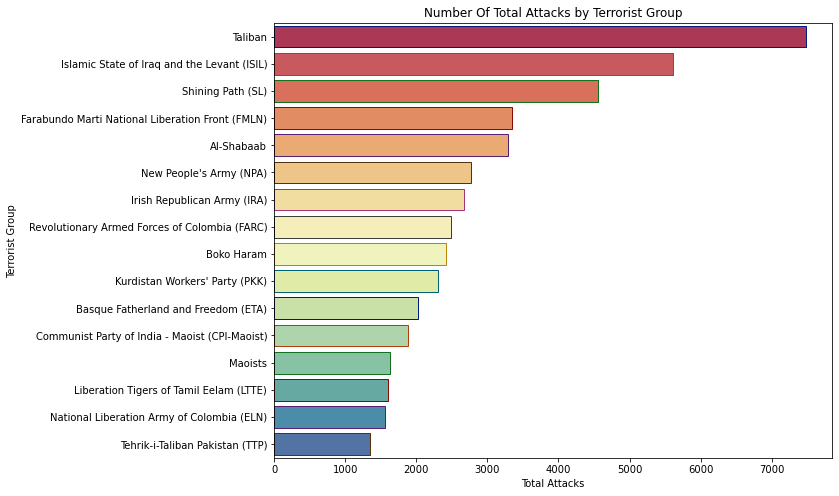

In [88]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='Spectral',
            edgecolor=sns.color_palette('dark', 10))

plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

### Top Terrorist Groups Activities from 1970 to 2017

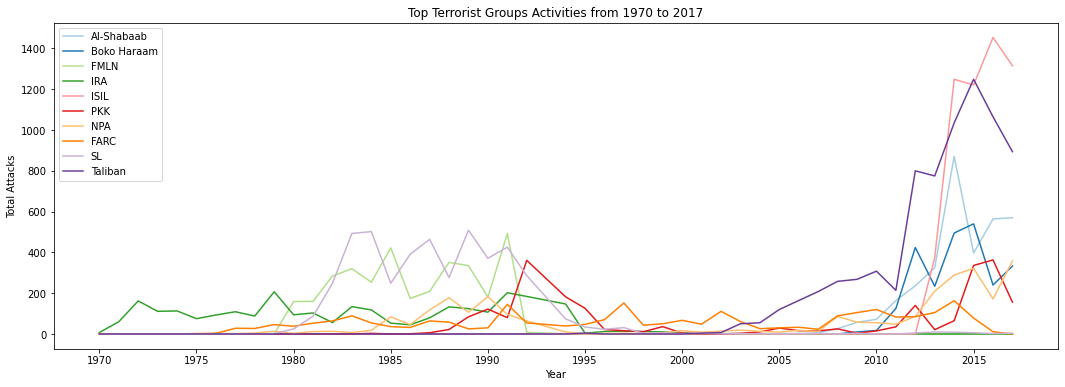

In [89]:
groups_10 = data[data.Group.isin(data.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()

In [90]:
# Total Number of people killed in terror attack
killData = data.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


### Insights derive from above EDA
Iraq has the most attacks 

The Middle East and North Africa region has most targeted 

Maximum number of attack are from Bombing/Explosion

There are maximum number attacka are on Private citizen and Property

Taliban and ISIL has most active organisation